# CHATBOTS - Using Natural Language Processing and Tensorflow

In [1]:
#Used in Tensorflow Model
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tflearn
import random
import re



Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:

#Used  for Contextualisation and Other NLP Tasks.


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#Other
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
import nltk
from nltk.stem import SnowballStemmer
nltk.download(['stopwords'])

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\psund\anaconda3\envs\qwerty\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print("Processing the Intents.....")
with open('intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [5]:
words = []
classes = []
documents = []
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print("words are",words)
print("classes are",classes)
print("documents are",documents)

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......
words are ['Hi', 'Hello', 'Hey', 'Good', 'day', 'How', 'are', 'you', '?', 'Goodbye', 'Bye', 'See', 'you', 'later', 'Talk', 'to', 'you', 'later', 'Who', 'created', 'you', '?', 'Who', 'is', 'your', 'developer', '?', 'Who', 'made', 'you', '?', 'What', 'is', 'your', 'name', '?', 'What', 'should', 'I', 'call', 'you', '?', 'Who', 'are', 'you', '?', 'What', 'are', 'the', 'college', 'timings', '?', 'When', 'is', 'the', 'college', 'open', '?', 'What', 'are', 'your', 'hours', 'of', 'operation', '?', 'How', 'can', 'I', 'contact', 'the', 'college', '?', 'What', 'is', 'the', 'college', 'telephone', 'number', '?', 'Can', 'I', 'get', 'your', 'contact', 'number', '?', 'What', 'courses', 'are', 'offered', 'in', 'the', 'college', '?', 'Can', 'you', 'tell', 'me', 'about', 'the', 'available', 'courses', '?', 'What', 'are', 'the', 'branches', 'in', 'the', 'college', '?', 'How', 'much', 'is', 'the', 'college', '

In [6]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("Removing unnecessary spaces, special symbols, numbers, and stopwords")
words = [re.sub(r'[^a-zA-Z]', ' ', w).strip() for w in words if w.lower() not in stop_words]
words = sorted(list(set(filter(None, words))))
words = [word for word in words if not any(char.isdigit() for char in word)]
classes = sorted(list(set(classes)))
print(len(words), "words obtained after unnecessary things")
print("words are",words)
print(classes)
print(documents)

Removing unnecessary spaces, special symbols, numbers, and stopwords
353 words obtained after unnecessary things
words are ['Bye', 'Career', 'Good', 'Goodbye', 'Greek', 'Hello', 'Hey', 'Hi', 'See', 'Services', 'TAs', 'Talk', 'Tell', 'WiFi', 'able', 'abroad', 'academic', 'accessible', 'active', 'activities', 'address', 'administrators', 'admission', 'advising', 'advisors', 'aid', 'alumni', 'among', 'anything', 'apart', 'area', 'areas', 'around', 'assignments', 'assist', 'assistance', 'assistants', 'association', 'athletic', 'attend', 'attended', 'attractions', 'available', 'average', 'backgrounds', 'belong', 'best', 'big', 'body', 'branches', 'buildings', 'call', 'campus', 'capstone', 'career', 'center', 'centers', 'choose', 'class', 'classes', 'classroom', 'cliques', 'cliquish', 'clubs', 'co op', 'collaborative', 'college', 'comfortable', 'community', 'complaint', 'complex', 'computer', 'connect', 'connectivity', 'contact', 'cooperative', 'could', 'countries', 'course', 'courses', 'cre

In [7]:
ignore_words = ['?', '_', '!', '-']
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents",documents)
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Lowering and Removing Duplicates.......
222 documents [(['Hi'], 'greeting'), (['Hello'], 'greeting'), (['Hey'], 'greeting'), (['Good', 'day'], 'greeting'), (['How', 'are', 'you', '?'], 'greeting'), (['Goodbye'], 'farewell'), (['Bye'], 'farewell'), (['See', 'you', 'later'], 'farewell'), (['Talk', 'to', 'you', 'later'], 'farewell'), (['Who', 'created', 'you', '?'], 'creator'), (['Who', 'is', 'your', 'developer', '?'], 'creator'), (['Who', 'made', 'you', '?'], 'creator'), (['What', 'is', 'your', 'name', '?'], 'identity'), (['What', 'should', 'I', 'call', 'you', '?'], 'identity'), (['Who', 'are', 'you', '?'], 'identity'), (['What', 'are', 'the', 'college', 'timings', '?'], 'hours'), (['When', 'is', 'the', 'college', 'open', '?'], 'hours'), (['What', 'are', 'your', 'hours', 'of', 'operation', '?'], 'hours'), (['How', 'can', 'I', 'contact', 'the', 'college', '?'], 'contact'), (['What', 'is', 'the', 'college', 'telephone', 'number', '?'], 'contact'), (['Can', 'I', 'get', 'your', 'co

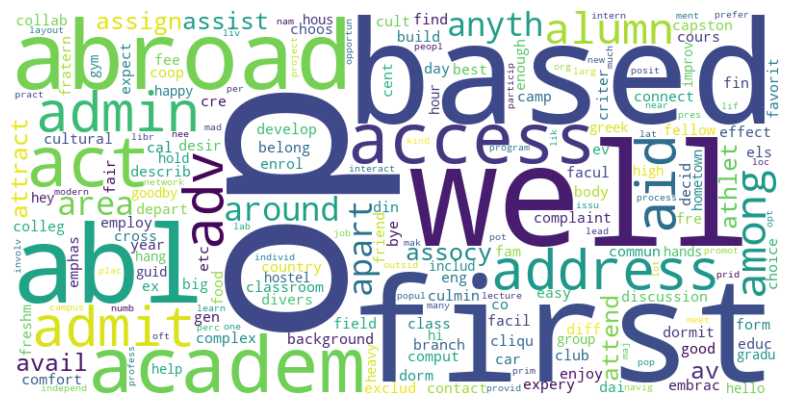

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your existing code for preprocessing without stemming
ignore_words = ['?', '_', '!', '-']
words = [w.lower() for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

# Assuming 'documents' is a list of strings containing your text data

# Combine all words into a single string
text = " ".join(words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:
from nltk import ngrams
from collections import Counter

In [10]:
#generating bigram
n = 2  
bigrams = ngrams(words, n)
# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)

# Print the bigram frequencies
for bigram, count in bigram_counts.items():
    print(f"{bigram}: {count} times")


('abl', 'abroad'): 1 times
('abroad', 'academ'): 1 times
('academ', 'access'): 1 times
('access', 'act'): 1 times
('act', 'address'): 1 times
('address', 'admin'): 1 times
('admin', 'admit'): 1 times
('admit', 'adv'): 1 times
('adv', 'aid'): 1 times
('aid', 'alumn'): 1 times
('alumn', 'among'): 1 times
('among', 'anyth'): 1 times
('anyth', 'apart'): 1 times
('apart', 'are'): 1 times
('are', 'area'): 1 times
('area', 'around'): 1 times
('around', 'assign'): 1 times
('assign', 'assist'): 1 times
('assist', 'assocy'): 1 times
('assocy', 'athlet'): 1 times
('athlet', 'attend'): 1 times
('attend', 'attract'): 1 times
('attract', 'av'): 1 times
('av', 'avail'): 1 times
('avail', 'background'): 1 times
('background', 'belong'): 1 times
('belong', 'best'): 1 times
('best', 'big'): 1 times
('big', 'body'): 1 times
('body', 'branch'): 1 times
('branch', 'build'): 1 times
('build', 'bye'): 1 times
('bye', 'cal'): 1 times
('cal', 'camp'): 1 times
('camp', 'capston'): 1 times
('capston', 'car'): 1 

In [11]:
# Generating trigrams
n = 3  
trigrams = ngrams(words, n)

# Count the occurrences of each trigram
trigram_counts = Counter(trigrams)

# Print the trigram frequencies
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count} times")


('abl', 'abroad', 'academ'): 1 times
('abroad', 'academ', 'access'): 1 times
('academ', 'access', 'act'): 1 times
('access', 'act', 'address'): 1 times
('act', 'address', 'admin'): 1 times
('address', 'admin', 'admit'): 1 times
('admin', 'admit', 'adv'): 1 times
('admit', 'adv', 'aid'): 1 times
('adv', 'aid', 'alumn'): 1 times
('aid', 'alumn', 'among'): 1 times
('alumn', 'among', 'anyth'): 1 times
('among', 'anyth', 'apart'): 1 times
('anyth', 'apart', 'are'): 1 times
('apart', 'are', 'area'): 1 times
('are', 'area', 'around'): 1 times
('area', 'around', 'assign'): 1 times
('around', 'assign', 'assist'): 1 times
('assign', 'assist', 'assocy'): 1 times
('assist', 'assocy', 'athlet'): 1 times
('assocy', 'athlet', 'attend'): 1 times
('athlet', 'attend', 'attract'): 1 times
('attend', 'attract', 'av'): 1 times
('attract', 'av', 'avail'): 1 times
('av', 'avail', 'background'): 1 times
('avail', 'background', 'belong'): 1 times
('background', 'belong', 'best'): 1 times
('belong', 'best', 'bi

In [12]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        tokenized_words = nltk.word_tokenize(pattern)
        stemmed_words = [stemmer.stem(word.lower()) for word in tokenized_words]
        print(f"Pattern: {pattern}")
        print(f"Tokenized words: {tokenized_words}")
        print(f"Stemmed words: {stemmed_words}\n")


Pattern: Hi
Tokenized words: ['Hi']
Stemmed words: ['hi']

Pattern: Hello
Tokenized words: ['Hello']
Stemmed words: ['hello']

Pattern: Hey
Tokenized words: ['Hey']
Stemmed words: ['hey']

Pattern: Good day
Tokenized words: ['Good', 'day']
Stemmed words: ['good', 'day']

Pattern: How are you?
Tokenized words: ['How', 'are', 'you', '?']
Stemmed words: ['how', 'ar', 'you', '?']

Pattern: Goodbye
Tokenized words: ['Goodbye']
Stemmed words: ['goodby']

Pattern: Bye
Tokenized words: ['Bye']
Stemmed words: ['bye']

Pattern: See you later
Tokenized words: ['See', 'you', 'later']
Stemmed words: ['see', 'you', 'lat']

Pattern: Talk to you later
Tokenized words: ['Talk', 'to', 'you', 'later']
Stemmed words: ['talk', 'to', 'you', 'lat']

Pattern: Who created you?
Tokenized words: ['Who', 'created', 'you', '?']
Stemmed words: ['who', 'cre', 'you', '?']

Pattern: Who is your developer?
Tokenized words: ['Who', 'is', 'your', 'developer', '?']
Stemmed words: ['who', 'is', 'yo', 'develop', '?']

Patte

In [13]:
from nltk.stem import PorterStemmer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
import tensorflow 

In [16]:
print("Creating the Data for our Model.....")
training = []
output = []
print("Creating an List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Traning Set, Bag of Words for our Model....")
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
print(training)

Creating the Data for our Model.....
Creating an List (Empty) for Output.....
Creating Traning Set, Bag of Words for our Model....
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

In [17]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)

print("Creating Training list")
train_x = list(training[:, 0])
train_y = list(training[:, 1])

# Count of 0s and 1s in the training array
count_zeros = np.sum(training[:, 0] == 0)
count_ones = np.sum(training[:, 0] == 1)

print("Count of 0s in training:", count_zeros)
print("Count of 1s in training:", count_ones)

print("Building Neural Network for Our Chatbot to be Contextual....")
print("Resetting graph data....")
tf.reset_default_graph()
print(training)


Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Training list
Count of 0s in training: 0
Count of 1s in training: 0
Building Neural Network for Our Chatbot to be Contextual....
Resetting graph data....
[[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [18]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)

print("Creating Training list")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Building Neural Network for Out Chatbot to be Contextual....")
print("Resetting graph data....")
tf.reset_default_graph()
print(training)

Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Training list
Building Neural Network for Out Chatbot to be Contextual....
Resetting graph data....
[[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [19]:
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")
print(net)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training....
Tensor("FullyConnected_1/Softmax:0", shape=(?, 75), dtype=float32)


In [20]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [21]:

print("Here i am using stochiastic Gradient Descent ALgorithm")
model_filename = 'model.tflearn'
print("Training the model...")
# Assuming you have 'train_x' and 'train_y' defined
model.fit(train_x, train_y, n_epoch=1000, batch_size=12, show_metric=True)
print("Saving the trained model...")
model.save(model_filename)
print("Model saved successfully!")

Training Step: 18999  | total loss: 0.41828 | time: 0.042s
| Adam | epoch: 1000 | loss: 0.41828 - acc: 0.9572 -- iter: 216/222
Training Step: 19000  | total loss: 0.38137 | time: 0.044s
| Adam | epoch: 1000 | loss: 0.38137 - acc: 0.9615 -- iter: 222/222
--
Saving the trained model...
INFO:tensorflow:c:\Users\psund\Documents\chatbot intents - Copy\chatbot intents - Copy\model.tflearn is not in all_model_checkpoint_paths. Manually adding it.
Model saved successfully!


In [22]:
print("Pickle is also Saved..........")
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )
print(pickle)

Pickle is also Saved..........
<module 'six.moves.cPickle' (<six._SixMetaPathImporter object at 0x000001ABE44CDCD0>)>


In [23]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('intents.json') as json_data:
    intents = json.load(json_data)
    
#print("Loading the Model......")
#model.load("./model.tflearn")


Loading Pickle.....


In [24]:
def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.8
print("ERROR_THRESHOLD = 0.8")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.8


In [27]:
project = model.load("./model.tflearn")

intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.8
print("ERROR_THRESHOLD = 0.8")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return random.choice(i['responses'])

            results.pop(0)           
            
#Creating GUI with tkinter
import tkinter
from tkinter import *

def send(event=None):
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    
    if msg == 'quit':
        base.destroy()  # exit the program if the user entered "quit"
    elif msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#333333", font=("Arial", 14))
    
        res = response(msg)
        if res is not None:
            ChatLog.insert(END, "Bot: " + res + '\n\n')
            
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("Chatbot")
base.geometry("1300x575")
base.configure(bg="#444444")
base.resizable(width=False, height=False)

#Create Chat window
ChatLog = Text(base, bd=0, bg="#ffffff", height="10", width="60", font=("Arial", 14),)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="hand2")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Arial",16), text="Send", width="10", height=3,
                    bd=0, bg="#0080ff", activebackground="#0059b3",fg='#ffffff',
                    command=send)

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="#ffffff", width="40", height="4", font=("Arial", 14))
EntryBox.bind("<Return>", send)  # bind the "Enter" key to the send function

#Place all components on the screen
ChatLog.place(x=20,y=20, height=420, width=1250)
scrollbar.place(x=1250, y=20, height=420)
EntryBox.place(x=20, y=460, height=100, width=1100)
SendButton.place(x=1149, y=457, height=100)

base.mainloop()


INFO:tensorflow:Restoring parameters from c:\Users\psund\Documents\chatbot intents - Copy\chatbot intents - Copy\model.tflearn
ERROR_THRESHOLD = 0.8
